In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# X_train_flat=X_train.reshape(len(X_train),28*28)

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, input_shape=(28*28,), activation="sigmoid"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5908 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3629 - accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3300 - accuracy: 0.8988
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.9030
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.9099


#<----------------------------  DAY 2  ------------------------------->

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9198


[0.2651771903038025, 0.9197999835014343]

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[3]

array([9.9673712e-01, 1.9232101e-04, 5.6663501e-01, 1.1748413e-01,
       4.0979865e-03, 2.1443924e-01, 4.0023893e-01, 4.4304207e-01,
       1.1858947e-02, 8.2510926e-02], dtype=float32)

In [ ]:
np.argmax(y_pred[3])

0

In [ ]:
lst=[]
for mdl in y_pred:
  lst.append(np.argmax(mdl))

In [ ]:
lst=np.array(lst)

In [ ]:
y_test[17],y_pred[17], np.argmax(y_pred[17]),lst[17]

(7,
 array([1.8771279e-01, 5.9291380e-03, 6.4298123e-01, 8.4878594e-01,
        1.3581597e-03, 1.4403181e-01, 7.1495060e-06, 9.9926710e-01,
        2.5070738e-03, 5.4316694e-01], dtype=float32),
 7,
 7)

In [ ]:
cm=tf.math.confusion_matrix(y_test,lst)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

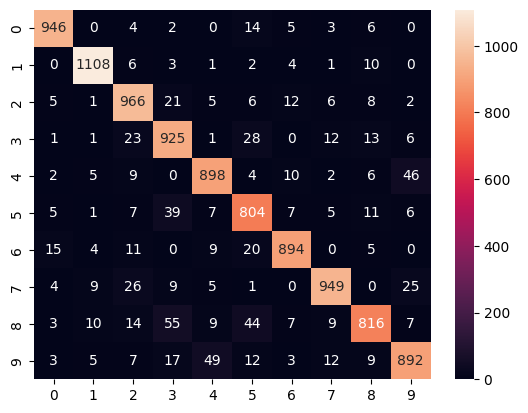

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

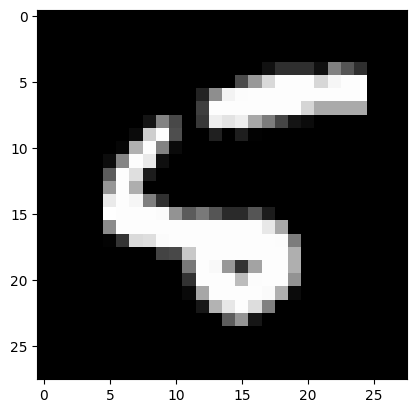

In [ ]:
plt.imshow(X_test[8], cmap='gray')

# SIGMOID ACTIVATION FUNCTION  


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
print(sigmoid(-499))

1.9366606581912876e-217


In [ ]:
def log_loss(y_t,y_p):
  y_p=[]
  return -np.mean(y_t*np.log(y_p) + (1-y_t)* (np.log(1-y_p)))

# RELU ACTIVATION FUNCTION

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
print(relu(-23))

0


#ELU ACTIVATION FUNCTION

In [ ]:
def elu(x):
  if x>0:
    return x
  else:
    return (np.exp(x)-1)

In [ ]:
print(elu(-7))

-0.9990881180344455


#LEAKYRELU ACTIVATION FUNCTION

In [ ]:
def leakyrelu(x):
  if x >0:
    return x
  else:
    return (0.01*x)

In [ ]:
leakyrelu(-2)

-0.02

# <-----------------------------------------------------  DAY :- 03  ---------------------------------------------------------->

In [ ]:
a=np.array([1,2,3,7])
b=np.array([2,3,4,4])

total=np.sum(np.abs(a,b))


In [ ]:
MSE = total / len(a)

In [ ]:
print("Mean Sequaed Error is = ",MSE)

Mean Sequaed Error is =  3.25


In [ ]:
-np.mean(a* np.log(b)+(1-a)*np.log(1-b))

<ipython-input-30-01710b7f448e>:1: RuntimeWarning: divide by zero encountered in log
  -np.mean(a* np.log(b)+(1-a)*np.log(1-b))
<ipython-input-30-01710b7f448e>:1: RuntimeWarning: invalid value encountered in log
  -np.mean(a* np.log(b)+(1-a)*np.log(1-b))
<ipython-input-30-01710b7f448e>:1: RuntimeWarning: invalid value encountered in multiply
  -np.mean(a* np.log(b)+(1-a)*np.log(1-b))


nan

In [ ]:
def fun(a,b):
  e=1e-10
  y_n=[max(i,e) for i in b]
  y_n=[max(i,1-e) for i in b]
  y_n=np.array(y_n)
  return -np.mean(a* np.log(b)+(1-a)*np.log(1-b))

In [ ]:
fun(a,b)

<ipython-input-31-babd854cdabd>:6: RuntimeWarning: divide by zero encountered in log
  return -np.mean(a* np.log(b)+(1-a)*np.log(1-b))
<ipython-input-31-babd854cdabd>:6: RuntimeWarning: invalid value encountered in log
  return -np.mean(a* np.log(b)+(1-a)*np.log(1-b))
<ipython-input-31-babd854cdabd>:6: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(a* np.log(b)+(1-a)*np.log(1-b))


nan

# <----------------///////////  DAY - 04  ////////-------------------->

# Gradient Descent Implement

In [ ]:
def gradient_descent(age,aff,y_t,epoches,loss_thr):
  w1=1
  w2=2
  b=0
  n=len(age)
  LR=0.5

  for i in range(epoches):
    W_S= w1*age + w2 * aff + b
    y_p= sigmoid(W_S)
    loss= log_loss(y_t,y_p)

    w_age= (1/n)*np.dot(age,(y_t-y_p))
    w_aff= (1/n)*np.dot(aff,(y_t-y_p))
    bais= np.dot(aff,(y_t-y_p))

    w1=w1-LR*w_age
    w2=w2-LR*w_aff
    b=b - LR * bais
    print("Epochs",i,)
  return w1,w2,bais